In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

In [122]:
pd.set_option('display.max_rows',100)

In [124]:
df = pd.read_excel('asda4_lego_data.xlsx')
df.head()

,Code,Shape,Length,Width,Height,Color,Quantity
0,D_4_2_R_RE-1,Duplo,4,2,Regular,RE-1,1
1,D_4_2_R_GR-3,Duplo,4,2,Regular,GR-3,1
2,D_4_2_F_GR-3,Duplo,4,2,Flat,GR-3,1
3,D_2_2_R_YE-2,Duplo,2,2,Regular,YE-2,1
4,D_2_2_R_PK-2,Duplo,2,2,Regular,PK-2,1


In [126]:
df['Shape'].replace('Normal ','Normal', inplace=True)
print(df['Shape'].unique())

['Duplo' 'Normal' 'Rooftop' 'Circle' 'Opp_Roof']


In [128]:
df_specials = pd.read_excel('asda4_lego_data.xlsx', sheet_name='Table_2')
df_specials.head()

,Code,Shape,Size,Color,Quantity
0,W_B_BK-1,Wheel_Outer,Biggest,BK-1,2
1,W_N_BK-1,Wheel_Outer,Normal,BK-1,3
2,W_S_BK-1,Wheel_Outer,Smallest,BK-1,1
3,W_B_GY-1,Wheel_Inner,Biggest,GY-1,2
4,W_N_GY-1,Wheel_Inner,Normal,GY-1,3


In [130]:
df_colors = pd.read_excel('asda4_lego_data.xlsx',sheet_name='Table_3')
df_colors.head()

,Color Name,Code,Color,HEX code,Unnamed: 4,Unnamed: 5
0,Red,RE-1,NaN,#BD1824,NaN,NaN
1,Orange,OR-1,NaN,#BC6208,NaN,NaN
2,Yellow1,YE-1,NaN,#D9C343,NaN,
3,Yellow2,YE-2,NaN,#BA830D,NaN,NaN
4,Yellow3,YE-3,NaN,#C78303,NaN,NaN


In [132]:
df_colors.drop(columns=['Unnamed: 4','Unnamed: 5'],inplace=True)
df_colors.head()

,Color Name,Code,Color,HEX code
0,Red,RE-1,NaN,#BD1824
1,Orange,OR-1,NaN,#BC6208
2,Yellow1,YE-1,NaN,#D9C343
3,Yellow2,YE-2,NaN,#BA830D
4,Yellow3,YE-3,NaN,#C78303


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Code      78 non-null     object
 1   Shape     78 non-null     object
 2   Length    78 non-null     int64 
 3   Width     78 non-null     int64 
 4   Height    78 non-null     object
 5   Color     78 non-null     object
 6   Quantity  78 non-null     int64 
dtypes: int64(3), object(4)
memory usage: 4.4+ KB


Axes(0.125,0.653529;0.227941x0.226471)
Axes(0.398529,0.653529;0.227941x0.226471)
Axes(0.672059,0.653529;0.227941x0.226471)
Axes(0.125,0.381765;0.227941x0.226471)


C:\Users\muqee\AppData\Local\Temp\ipykernel_30668\3917182269.py:22: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')


Axes(0.672059,0.381765;0.227941x0.226471)


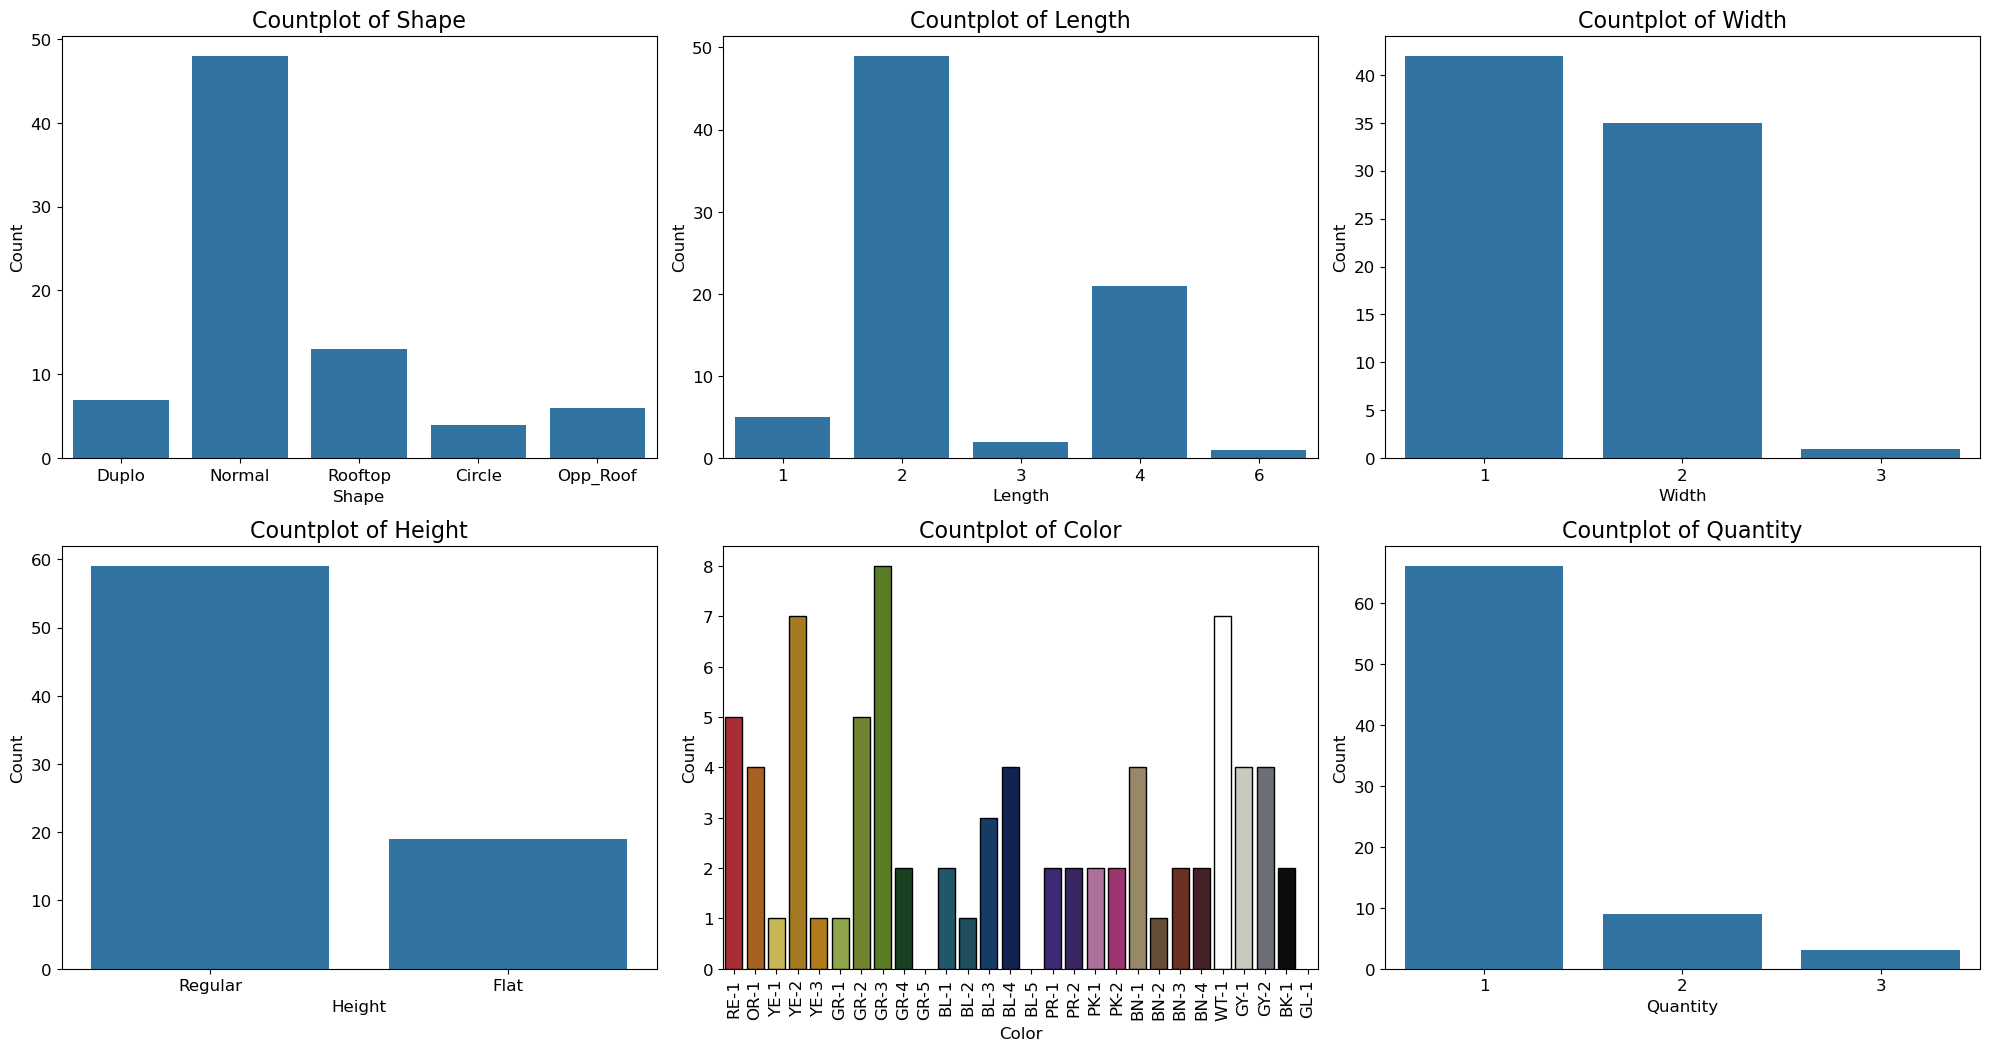

In [136]:
# Create a color mapping dictionary from df_colors
color_mapping = dict(zip(df_colors['Code'], df_colors['HEX code']))

# Set up the grid
num_cols = len(df.columns)
rows = (num_cols // 3) + 1  # Adjust to control the number of rows
fig, axes = plt.subplots(rows, 3, figsize=(20, rows * 5))  # Adjust width and height
axes = axes.flatten()  # Flatten to easily iterate over

# Loop over columns and plot each one in a countplot
for i, col in enumerate(df.columns[1:]):
    ax = axes[i]
    
    ax.set_title(f'Countplot of {col}', fontsize=16)  # Set title font size
    ax.set_xlabel(col, fontsize=12)  # Set x-axis title font size
    ax.set_ylabel('Count', fontsize=12)  # Set y-axis title font size
    ax.tick_params(axis='both', labelsize=12)  # Set axis label font size

    # Set vertical x-axis labels for the 'Color' column
    if col == 'Color':
        sns.countplot(x=df[col], ax=ax, hue=df[col], palette=color_mapping, legend=False, edgecolor='black', order=df_colors['Code'])
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
    
    else:
        print(ax)
        sns.countplot(x=df[col], ax=ax)

# Remove any unused axes if there are extra spaces in the grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

C:\Users\muqee\AppData\Local\Temp\ipykernel_30668\719342204.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')


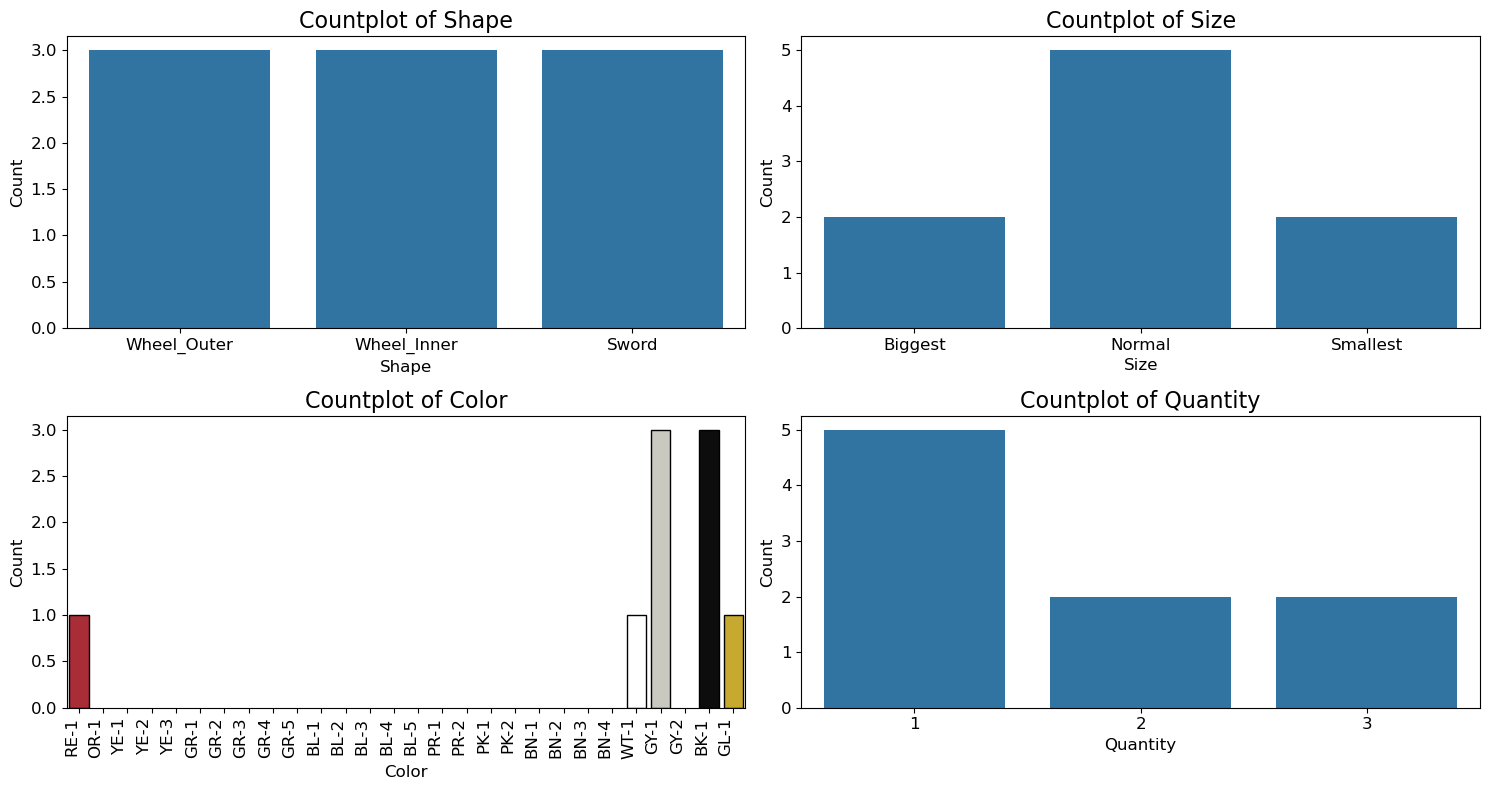

In [156]:
# Create a color mapping dictionary from df_colors
color_mapping = dict(zip(df_colors['Code'], df_colors['HEX code']))

# Set up the grid
num_cols = len(df_specials.columns)
rows = (num_cols // 3) + 1   # Adjust to control the number of rows
fig, axes = plt.subplots(rows, 2, figsize=(15, rows * 4))  # Adjust width and height
axes = axes.flatten()  # Flatten to easily iterate over

# Loop over columns and plot each one in a countplot
for i, col in enumerate(df_specials.columns[1:]):
    ax = axes[i]
    ax.set_title(f'Countplot of {col}', fontsize=16)  # Set title font size
    ax.set_xlabel(col, fontsize=12)  # Set x-axis title font size
    ax.set_ylabel('Count', fontsize=12)  # Set y-axis title font size
    ax.tick_params(axis='both', labelsize=12)  # Set axis label font size

    # Set vertical x-axis labels for the 'Color' column
    if col == 'Color':
        sns.countplot(x=df_specials[col], ax=ax, hue=df_specials[col], palette=color_mapping, legend=False, edgecolor='black', order=df_colors['Code'])
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
    
    else:
        sns.countplot(x=df_specials[col], ax=ax)

# Remove any unused axes if there are extra spaces in the grid
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [158]:
df

,Code,Shape,Length,Width,Height,Color,Quantity
0,D_4_2_R_RE-1,Duplo,4,2,Regular,RE-1,1
1,D_4_2_R_GR-3,Duplo,4,2,Regular,GR-3,1
2,D_4_2_F_GR-3,Duplo,4,2,Flat,GR-3,1
3,D_2_2_R_YE-2,Duplo,2,2,Regular,YE-2,1
4,D_2_2_R_PK-2,Duplo,2,2,Regular,PK-2,1
5,D_2_2_R_WT-1,Duplo,2,2,Regular,WT-1,1
6,D_2_2_R_BL-1,Duplo,2,2,Regular,BL-1,1
7,N_2_3_R_YE-2,Normal,2,3,Regular,YE-2,1
8,N_2_2_R_YE-2,Normal,2,2,Regular,YE-2,1
9,N_2_1_R_YE-2,Normal,2,1,Regular,YE-2,3


In [160]:
df_specials

,Code,Shape,Size,Color,Quantity
0,W_B_BK-1,Wheel_Outer,Biggest,BK-1,2
1,W_N_BK-1,Wheel_Outer,Normal,BK-1,3
2,W_S_BK-1,Wheel_Outer,Smallest,BK-1,1
3,W_B_GY-1,Wheel_Inner,Biggest,GY-1,2
4,W_N_GY-1,Wheel_Inner,Normal,GY-1,3
5,W_S_WT-1,Wheel_Inner,Smallest,WT-1,1
6,S_N_RE-1,Sword,Normal,RE-1,1
7,S_N_GY-1,Sword,Normal,GY-1,1
8,S_N_GL-1,Sword,Normal,GL-1,1


In [162]:
df_colors

,Color Name,Code,Color,HEX code
0,Red,RE-1,NaN,#BD1824
1,Orange,OR-1,NaN,#BC6208
2,Yellow1,YE-1,NaN,#D9C343
3,Yellow2,YE-2,NaN,#BA830D
4,Yellow3,YE-3,NaN,#C78303
5,Green1,GR-1,NaN,#98B33A
6,Green2,GR-2,NaN,#7A9221
7,Green3,GR-3,NaN,#5E8A19
8,Green4,GR-4,NaN,#124920
9,Green5,GR-5,NaN,#0C1C1A
